 # NETFLIX : Data Exploration & Visualization
 
 ### Agenda: Helping Netflix find what type of show they should produce next. 

##### We will first import all the library which can be used in Data Analysis and Visualization.

In [59]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt,  seaborn as sns
%matplotlib inline

##### We will now load the data from the source file into a Dataframe and call it as 'df'.

In [60]:
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Netflix.csv")

##### Some initial exploration of the data

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


There are 12 columns with 8807 rows. Data type is string in all columns except release_year and some columns also have null values which will be dealt with in the next stage of our analysis.

In [62]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Above is the first 5 rows. We can see that show_id is used here to reference row number. Type contains Categorical data. While Cast, Country, Listed_In, Description etc. have string data type. Date added is also saved as string but has date values so we need to change the data type in order explore the data with dates. We can notice that some columns have comma seperated values as well which can be used if extracted from the columns. It can be observed that there are a lot of missing values in the data.

Let us now try to see if which columns have missing values.

In [63]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Let's see how the show types are distributed.

In [64]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

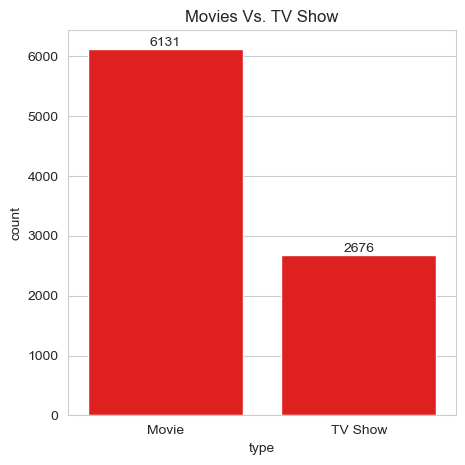

In [71]:
plt.figure(figsize = (5, 5))
cp = sns.countplot(x=df.type, data = df, color = 'red');
plt.title('Movies Vs. TV Show')
for i in cp.containers:
    cp.bar_label(i)
plt.savefig('Movies Vs. TV Show Comparison.png')

### Observation 1:
Overall, the count of type Movie is more than the type TV Show.

Let us now try to change the data types of the columns for analysis. We will first make a copy of the dataframe. We will call Temporary DataFrame, tdf in short.

In [65]:
tdf = df.copy()

Now, we will first change the dtype of 'date_added' column from string to date type. To that we will have to treat the missing values in this column. Let's see which rows have missing Date_added value and then drop the missing values and then change the datatype.

In [66]:
tdf[tdf.date_added.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [67]:
tdf.dropna(subset = 'date_added', inplace = True)

In [68]:
tdf.date_added = pd.to_datetime(tdf.date_added)

Let us now check the trend of Number of shows released on Netflix in recent years. To do this we will need to extract Year from the the 'Date_added' column. We will also extract the month name and date as well.

In [69]:
tdf['year'] = tdf['date_added'].dt.year
tdf['month'] = tdf['date_added'].dt.month_name()

Let us know see visualize the trend of show releases on Netflix over the years.

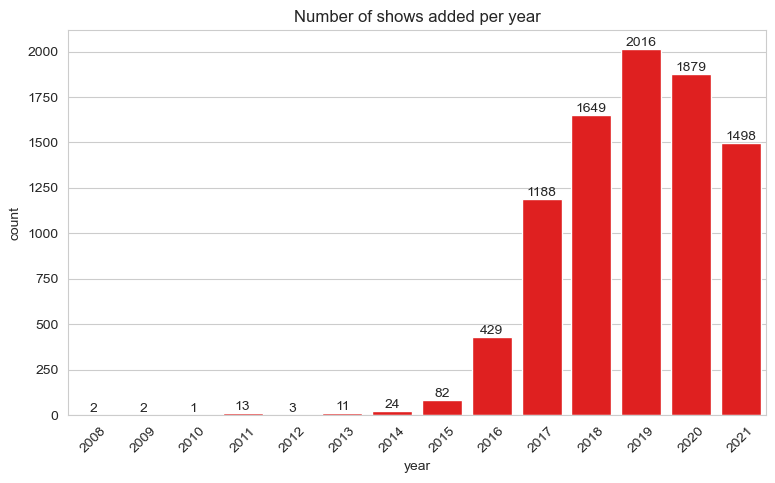

In [80]:
plt.figure(figsize = (9, 5))
sns.set_style('whitegrid')
cp = sns.countplot(x = 'year', data = tdf, color = 'red');
plt.xticks(rotation = 45);
plt.title('Number of shows added per year')
for i in cp.containers:
    cp.bar_label(i)
plt.savefig('Number of shows added per year.png')

Now let's see the data for different months of the year

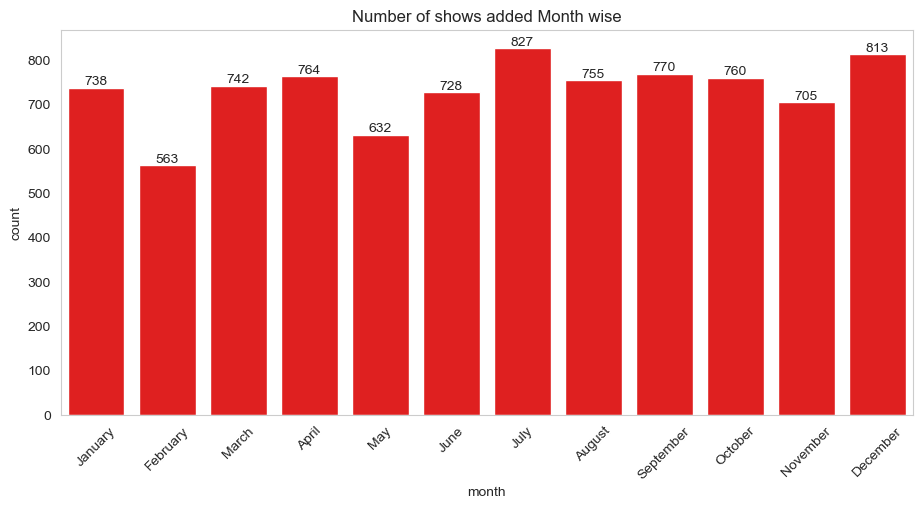

In [78]:
plt.figure(figsize = (11, 5))
cp = sns.countplot(x = 'month', data = tdf, color = 'red', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']);
plt.xticks(rotation = 45);
plt.grid(False);
plt.title('Number of shows added Month wise')
for i in cp.containers:
    cp.bar_label(i)
plt.savefig('Number of shows added Month wise.png')

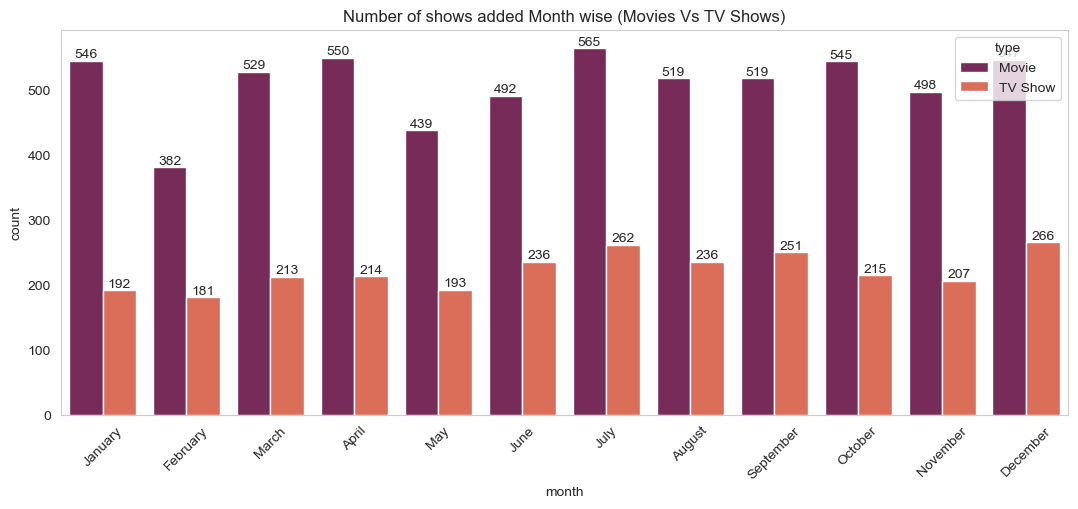

In [77]:
plt.figure(figsize = (13, 5))
cp = sns.countplot(x = 'month', data = tdf, hue = 'type', palette = 'rocket', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']);
plt.xticks(rotation = 45);
plt.title('Number of shows added Month wise (Movies Vs TV Shows)');
plt.grid(False);
for i in cp.containers:
    cp.bar_label(i)
plt.savefig('Number of shows added Month wise (Movies Vs TV Shows).png')

### Observation 2.
The rapid increase in the number of shows added can be seen in the Year wise Distribution of the data. But there is a dip in volume after 2019. This should have been caused due to Corovirus Outbreak. Monthly Distribution shows that the number of shows that Netflix adds throughout the year is fairly consistent. Interestingly, July has got the most number of shows released whether February has the least. We can also see how the type Movie is dominating type TV Show.

Let us try to see how the distribution has changed after 2020 and then separately for years 2020 and 2021.

In [81]:
before_covid = tdf[tdf.release_year <= 2019]
before_covid.type.value_counts()

Movie      5337
TV Show    1915
Name: type, dtype: int64

In [82]:
after_covid= tdf[tdf['release_year'] >=2020]
after_covid.type.value_counts()

Movie      794
TV Show    751
Name: type, dtype: int64

In [83]:
year_2020 = tdf[tdf.release_year == 2020]
year_2020.type.value_counts()

Movie      517
TV Show    436
Name: type, dtype: int64

In [84]:
year_2021 = tdf[tdf.release_year==2021]
year_2021.type.value_counts()

TV Show    315
Movie      277
Name: type, dtype: int64

### Observation 3:
Clearly, it can be seen that the content market has been affected during Covid. We can observe the rise of TV Shows getting released on Netflix. But was there a trend? Let's visualize our data to understand this. We will now focus on the release year column.

In [85]:
tdf.release_year.isna().sum()


0

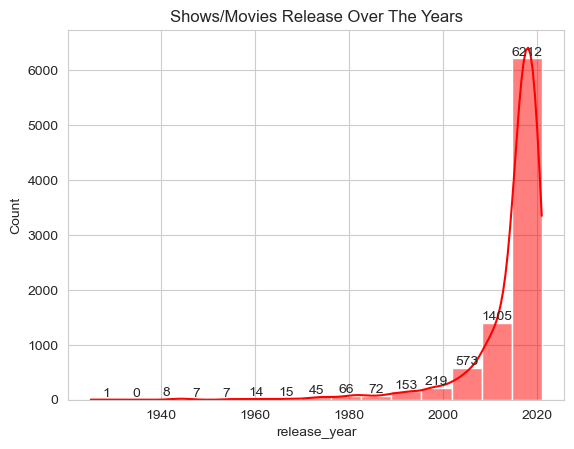

In [90]:
hp = sns.histplot(x = 'release_year', data = tdf, bins = 15, color = 'red', kde = True);
plt.title('Shows/Movies Release Over The Years');
for i in hp.containers:
    hp.bar_label(i)
plt.savefig('Shows Over the years.png')

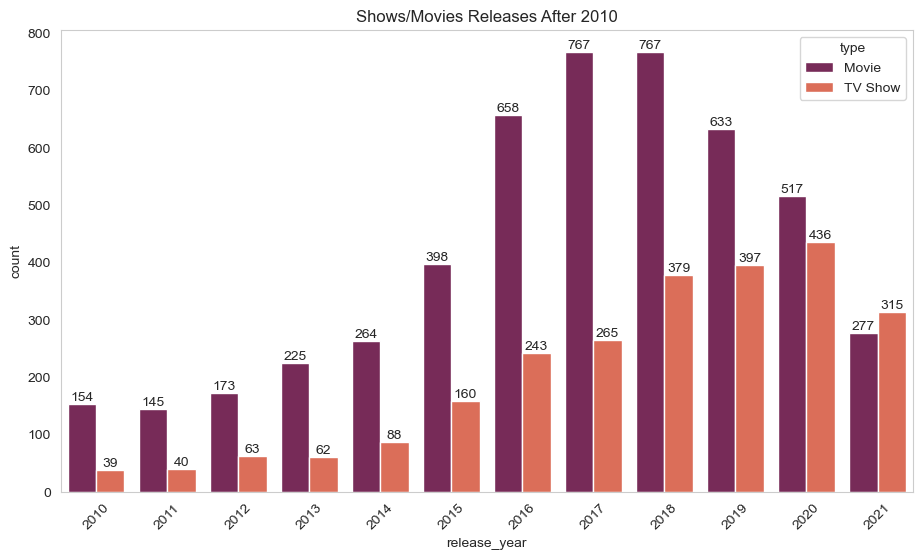

In [91]:
after_2010 = tdf[tdf.release_year >=2010]
plt.figure(figsize = (11, 6))
cp = sns.countplot(x = 'release_year', data = after_2010, hue = 'type', palette = 'rocket');
plt.xticks(rotation = 45);
plt.title('Shows/Movies Releases After 2010');
plt.grid(False)
for i in cp.containers:
    cp.bar_label(i)
plt.savefig('After 2010.png')

## Insight1:
Here we can observe the trends of Movies and TV Shows released after 2010. Clearly TV Shows are on the rise and Movies have reached a Peak and now are in a decline.

Let us know explore the ratings column to understand how many ratings are in there. But first, we need to treat the columns if there are any missing values or incorrect inputs.

In [98]:
tdf.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [99]:
tdf.rating.isna().sum()

4

Note: Here are 3 rows with incorrect rating and 4 rows have missing value. Let's check these rows.

In [100]:
tdf.loc[(tdf.rating == '74 min')|(tdf.rating == '84 min')|(tdf.rating == '66 min')|tdf.rating.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017,April
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016,September
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016,August
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,2017,January
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",2016,December
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take...",2018,February
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",2017,March


It seems that duration has been added mistakenly in the Rating column in the first 3 rows but there isn't any rating in there. So, we'll correct this by swapping the values in Rating and Duration.

In [101]:
tdf.loc[[5541,5794,5813], ['rating', 'duration']] = df.loc[[5541,5794,5813],['duration', 'rating']].values

In [102]:
tdf.loc[[5541, 5794, 5813], ['rating', 'duration']]

,rating,duration
5541,NaN,74 min
5794,NaN,84 min
5813,NaN,66 min


In [103]:
tdf.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

Now that we have corrected the ratings columns, lets deal with missing values. The rating NR is considered as 'Not Rated' so we will fill the missing values with NR.

In [104]:
tdf.rating = tdf.rating.fillna('NR')

In [32]:
tdf.rating.isna().sum()

0

Now lets plot the ratings to see which category has been most frequent.

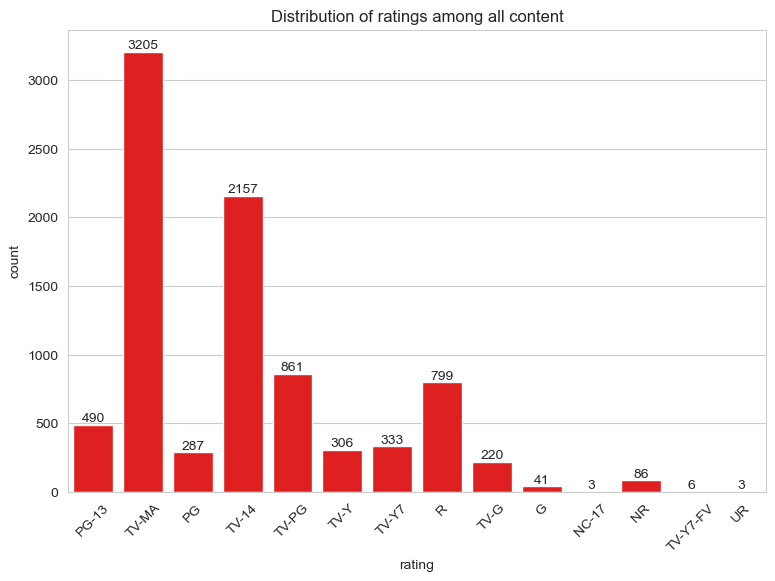

In [106]:
plt.figure(figsize = (9, 6))
cp = sns.countplot(x = 'rating', data = tdf, color = 'red');
plt.xticks(rotation = 45);
for i in cp.containers:
    cp.bar_label(i)
cp.set(title = 'Distribution of ratings among all content');
plt.savefig('Distribution of ratings among all content.png')

### Observation 4:
1. TV-MA rating has the most frequency among all shows. This may be unsuitable for children under 17. Possibly contains crude indecent language, explicit sexual activity or graphic violence.
2. TV-14 has second most frequency followed by  TV-PG and R.


Let's see the trend of the content over the last 20 years. We'll try to check the what rating was the most frequent in any given year after 2000.

In [107]:
after_2000 = tdf[tdf.release_year >= 2000]
grouped = after_2000.groupby('release_year').agg(most_popular_rating = ('rating', lambda x: x.mode())).reset_index()
grouped

,release_year,most_popular_rating
0,2000,PG-13
1,2001,R
2,2002,PG-13
3,2003,R
4,2004,TV-14
5,2005,TV-14
6,2006,TV-14
7,2007,TV-14
8,2008,TV-14
9,2009,TV-14


## Insight2 :

It can be observed that in the past 20 years, TV-14 has been the most popular overall. However, after 2015, TV-MA has been the most popular.

###

Now let us check the duration column to see how long the shows usually are. It should be noted that as the data is divided into movies and TV shows, so we will now have to separate the units for each show type. Note that the data type of duration is object (string). As the duration is the length, we must change the dtype of the column for our analysis. For that we have to filter out the missing values. Let's check the missing values.

In [109]:
tdf[tdf.duration.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month


In [112]:
tdf.dropna(subset = 'duration', inplace = True)

In [113]:
tdf['length'] = tdf.duration.apply(lambda x: int(x.split()[0]))
tdf['unit'] = tdf.duration.apply(lambda x: x.split()[1])
tdf.drop(columns = 'duration', inplace = True)

In [114]:
tdf.length.isna().sum()

0

We will now explore the lengths of both show types separately. To do this, we'll bifurcate the data into movies and tv shows dataframe.

In [115]:
movies = tdf.loc[tdf.type == "Movie"]
tv_shows = tdf.loc[tdf.type == "TV Show"]

In [116]:
movies.length.describe()

count    6131.000000
mean       99.564998
std        28.289504
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: length, dtype: float64

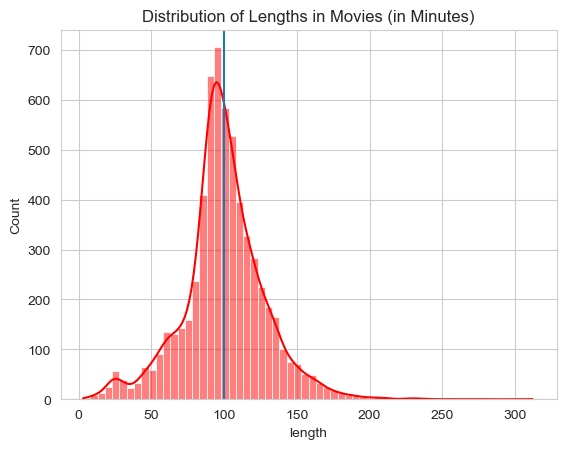

In [117]:
hp = sns.histplot(data = movies, x = 'length', color = 'red', kde = True, binwidth = 5);
hp.set(title = 'Distribution of Lengths in Movies (in Minutes)');
plt.axvline(x = movies.length.mean(), label = 'Mean Length (in Minutes)');
plt.savefig('Distribution of Lengths in Movies.png')

### Observation 5:
1. The Average Duration of the movies is 99.56 mins.
2. The median Duration of the movies is 98.00 mins.
3. The shortest movie is 3 mins long while the longest is 312.00 mins long!!

Now lets do the same for TV shows. Lets break the duration into units of seasons.

In [118]:
tv_shows[['length']].describe()

,length
count,2666.000000
mean,1.751313
std,1.550176
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,17.000000


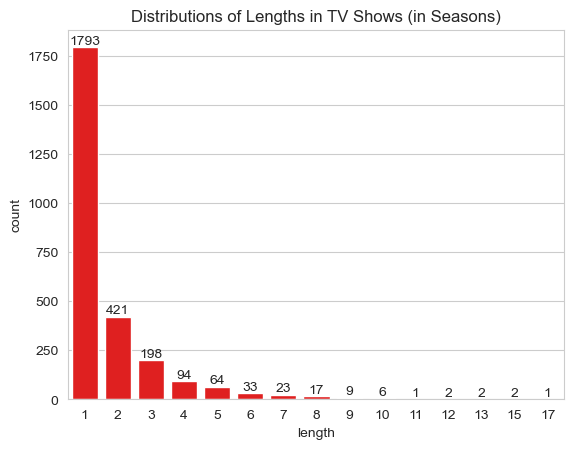

In [119]:
cp = sns.countplot(x = 'length', data = tv_shows, color = 'red')
for i in cp.containers:
    cp.bar_label(i)
cp.set(title = 'Distributions of Lengths in TV Shows (in Seasons)');

In [120]:
max_seasons = tv_shows.length.max()

In [121]:
tv_shows.loc[tv_shows.length == max_seasons]

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,year,month,length,unit
548,s549,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2021,July,17,Seasons


Let us now check for Outliers in our data. We'll use Boxplot.

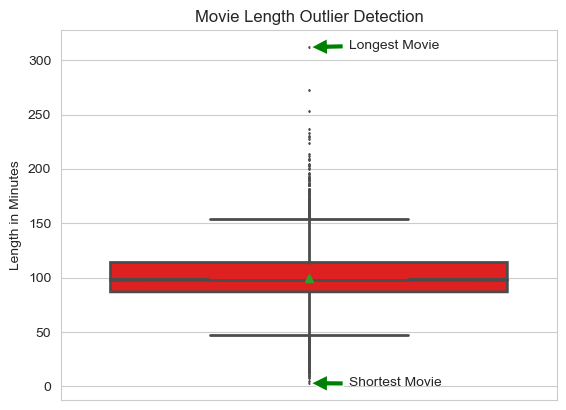

In [122]:
max_val = movies.length.max()
min_val = movies.length.min()
bp = sns.boxplot(y = 'length', data = movies, color = 'red', whis=1.5, fliersize=1, linewidth=2, notch=True, showmeans=True);
bp.set(ylabel = 'Length in Minutes', title = 'Movie Length Outlier Detection');
plt.annotate('Longest Movie', xy = (0, max_val), xytext =(0.08, 310), arrowprops = dict(facecolor ='green', shrink = 0.05),);
plt.annotate('Shortest Movie', xy = (0, min_val), xytext =(0.08, 0), arrowprops = dict(facecolor ='green', shrink = 0.05),);
plt.savefig('Movie Length Outlier Detection.png')

### Observation 6:
Outlier check: Movies longer than 150 minutes and shorter than 50 minutes are potential outliers.

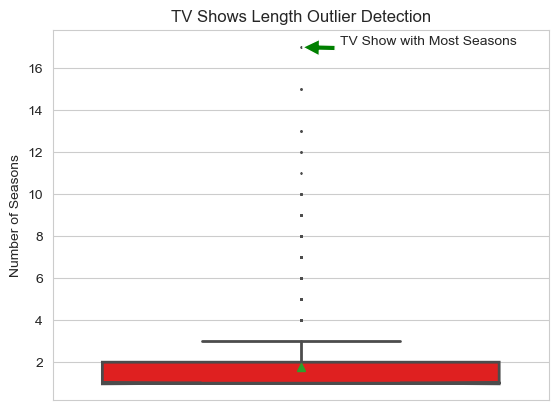

In [123]:
max_val = tv_shows.length.max()
bp = sns.boxplot(y = 'length', data = tv_shows, color = 'red', whis= 1.5, fliersize=1, linewidth=2, notch=True, showmeans=True);
bp.set(ylabel = 'Number of Seasons', title = 'TV Shows Length Outlier Detection');
plt.annotate('TV Show with Most Seasons', xy = (0, max_val), xytext =(0.08, 17.1), arrowprops = dict(facecolor ='green', shrink = 0.05),);
plt.savefig('TV Shows Length Outlier Detection.png')

### Observation 7:

1. The average TV show has 2 seasons (rough estimate) on the plaform
2. The median TV show has only 1 season on the plafrom
3. 75% of TV shows have less than or equal to 2 Seasons
4. Grey's Anatomy has most seasons, 17.
5. Outlier check- TV Shows with 4 or more seasons are potential outliers.

Let's see the trend of length of TV Shows in recent years

In [124]:
after_2010_tv_shows = tdf[(tdf.type == 'TV Show') & (tdf.release_year >=2010)]
after_2010_tv_shows.length.mean()

1.7157217531162043

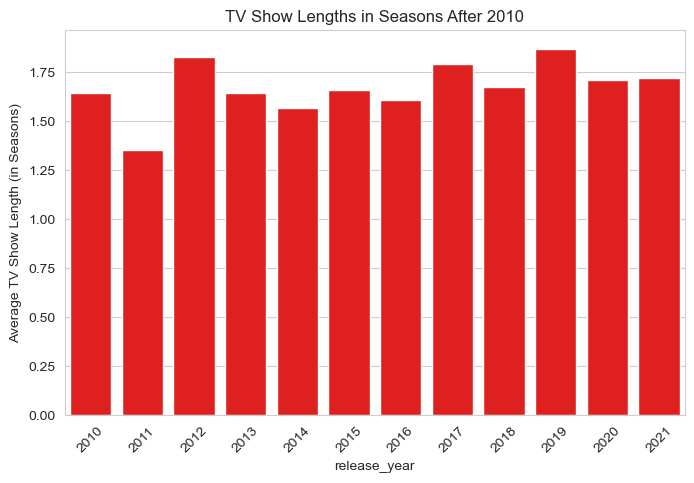

In [125]:
plt.figure(figsize = (8, 5))

sns.barplot(x = 'release_year', y = 'length', data = after_2010_tv_shows, color = 'red', ci = None);
plt.xticks(rotation = 45);
plt.ylabel('Average TV Show Length (in Seasons)');
plt.title('TV Show Lengths in Seasons After 2010');
plt.savefig('TV Show Lengths in Seasons After 2010.png')

## Insight 3:

On Average, a TV Show has around 1.71 Seasons in past 10 years. This trend has been consistent throughout the years after 2010.

Let us now use the Director, Cast, Country and Listed_in columns for our Multivariate Analysis. As we can see that these columns have multple strings concatinated, we cannot utilize the columns directly. For this, we will need to split the values into distinct rows. First lets get rid of the null values to simplify our dataset. We'll use Explode function to un-nest after splitting the columns.

In [126]:
tdf.dropna(subset = ['director', 'cast', 'country', 'listed_in'], axis = 0, inplace = True)

In [127]:
columns = ['director', 'cast', 'country', 'listed_in']

In [128]:
for i in columns:
    tdf[i] = tdf[i].str.strip(', ').str.split(',')

In [129]:
tdf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,year,month,length,unit
7,s8,Movie,Sankofa,[Haile Gerima],"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandr...","[United States, Ghana, Burkina Faso, United...",2021-09-24,1993,TV-MA,"[Dramas, Independent Movies, International M...","On a photo shoot in Ghana, an American model s...",2021,September,125,min
8,s9,TV Show,The Great British Baking Show,[Andy Devonshire],"[Mel Giedroyc, Sue Perkins, Mary Berry, Pau...",[United Kingdom],2021-09-24,2021,TV-14,"[British TV Shows, Reality TV]",A talented batch of amateur bakers face off in...,2021,September,9,Seasons
9,s10,Movie,The Starling,[Theodore Melfi],"[Melissa McCarthy, Chris O'Dowd, Kevin Kline...",[United States],2021-09-24,2021,PG-13,"[Comedies, Dramas]",A woman adjusting to life after a loss contend...,2021,September,104,min
12,s13,Movie,Je Suis Karl,[Christian Schwochow],"[Luna Wedler, Jannis Niewöhner, Milan Pesche...","[Germany, Czech Republic]",2021-09-23,2021,TV-MA,"[Dramas, International Movies]",After most of her family is murdered in a terr...,2021,September,127,min
24,s25,Movie,Jeans,[S. Shankar],"[Prashanth, Aishwarya Rai Bachchan, Sri Laks...",[India],2021-09-21,1998,TV-14,"[Comedies, International Movies, Romantic Mo...",When the father of the man she loves insists t...,2021,September,166,min


In [130]:
for i in columns:
    tdf = tdf.explode(i)

In [131]:
tdf.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,year,month,length,unit
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,Dramas,"On a photo shoot in Ghana, an American model s...",2021,September,125,min
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,Independent Movies,"On a photo shoot in Ghana, an American model s...",2021,September,125,min
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,International Movies,"On a photo shoot in Ghana, an American model s...",2021,September,125,min
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,2021-09-24,1993,TV-MA,Dramas,"On a photo shoot in Ghana, an American model s...",2021,September,125,min
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,2021-09-24,1993,TV-MA,Independent Movies,"On a photo shoot in Ghana, an American model s...",2021,September,125,min
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,2021-09-24,1993,TV-MA,International Movies,"On a photo shoot in Ghana, an American model s...",2021,September,125,min
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Burkina Faso,2021-09-24,1993,TV-MA,Dramas,"On a photo shoot in Ghana, an American model s...",2021,September,125,min
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Burkina Faso,2021-09-24,1993,TV-MA,Independent Movies,"On a photo shoot in Ghana, an American model s...",2021,September,125,min
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Burkina Faso,2021-09-24,1993,TV-MA,International Movies,"On a photo shoot in Ghana, an American model s...",2021,September,125,min
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United Kingdom,2021-09-24,1993,TV-MA,Dramas,"On a photo shoot in Ghana, an American model s...",2021,September,125,min


In [132]:
tdf.shape

(143078, 15)

As our data has been un-nested and has expanded. But is it clean enough for our analysis? Let's check.

In [133]:
tdf.country.value_counts()

United States     38059
India             21123
 United States     7714
United Kingdom     6107
 France            3657
                  ...  
 Afghanistan          2
 Panama               2
Venezuela             2
 Sri Lanka            2
 Nicaragua            1
Name: country, Length: 174, dtype: int64

It can be observed from the above that our data has got some issues after un-nesting. It has space characters in it. So, its safe to assume that this will be the same for all the columns we have un-nested so lets clean this by using strip function.

In [134]:
for i in columns:
    tdf[i] = tdf[i].str.strip()

In [135]:
tdf.country.value_counts()

United States     45773
India             21762
United Kingdom     9010
France             6816
Canada             5793
                  ...  
Vatican City          3
Afghanistan           2
Panama                2
Sri Lanka             2
Nicaragua             1
Name: country, Length: 109, dtype: int64

### Observation 8:
1. We can see that there are 109 distinct countries in the dataset.
2. United States is the maximum rows of the country column.

We can now group our data to find insights. Let's see the top 20 show/movie producing countries.

In [136]:
country = tdf.groupby(['country', 'type']).agg(shows_produced = ('show_id', 'nunique')).reset_index()
pivoted = country.pivot(index = 'country', columns = 'type', values = 'shows_produced')
pivoted.dropna(inplace = True)
pivoted.sort_values(by = 'Movie', ascending = False)[:20]

type,Movie,TV Show
country,,
United States,2447.0,41.0
India,932.0,8.0
United Kingdom,462.0,23.0
Canada,287.0,8.0
France,285.0,8.0
Germany,165.0,2.0
Spain,152.0,9.0
Japan,113.0,11.0
China,107.0,2.0


### Observation 9:
It can be observed that United States has produced the maximum of number of shows, followed by India and United Kingdom. We can also group this continent-wise to conclude that North America produces the most content followed by Asia and Europe.

Lets focus our attention to see how the content market has looked after 2020.

In [137]:
recent = tdf.loc[tdf.release_year >= 2020]

In [138]:
country = recent.groupby(['country', 'type']).agg(shows_produced = ('show_id', 'nunique')).reset_index()
pivoted = country.pivot(index = 'country', columns = 'type', values = 'shows_produced')
pivoted.dropna(inplace = True)
pivoted.sort_values(by = 'Movie', ascending = False)[:20]

type,Movie,TV Show
country,,
United States,223.0,9.0
India,83.0,4.0
United Kingdom,37.0,6.0
Canada,22.0,1.0
Spain,22.0,4.0
France,20.0,5.0
Indonesia,19.0,1.0
Germany,15.0,1.0
Mexico,14.0,1.0


### Observation 10:
It can be seen that USA dominates the content market, thanks to Hollywood! India is not so far behind. Followed by UK and France. Its worth mentioning the growth in content has been promising in South East Asian Countries. We can be looking at a potential new content market here.

Let us now understand the type of content now. Listed Column contains the different Genres of the movies and tv shows. We'll find the most produced category for each country.

In [139]:
top_category_for_each_country = tdf.groupby(['country', 'listed_in']).agg(shows_produced = ('show_id', 'nunique')).reset_index().sort_values(by = 'shows_produced', ascending = False).drop_duplicates(subset = 'country')
top_category_for_each_country

,country,listed_in,shows_produced
363,India,International Movies,840
977,United States,Dramas,827
945,United Kingdom,Dramas,195
266,France,International Movies,191
822,Spain,International Movies,124
...,...,...,...
541,Mauritius,Children & Family Movies,1
565,Montenegro,Dramas,1
512,Liechtenstein,Classic Movies,1
515,Lithuania,Dramas,1


Now, we can also check the content getting produced in the top 5 countries.

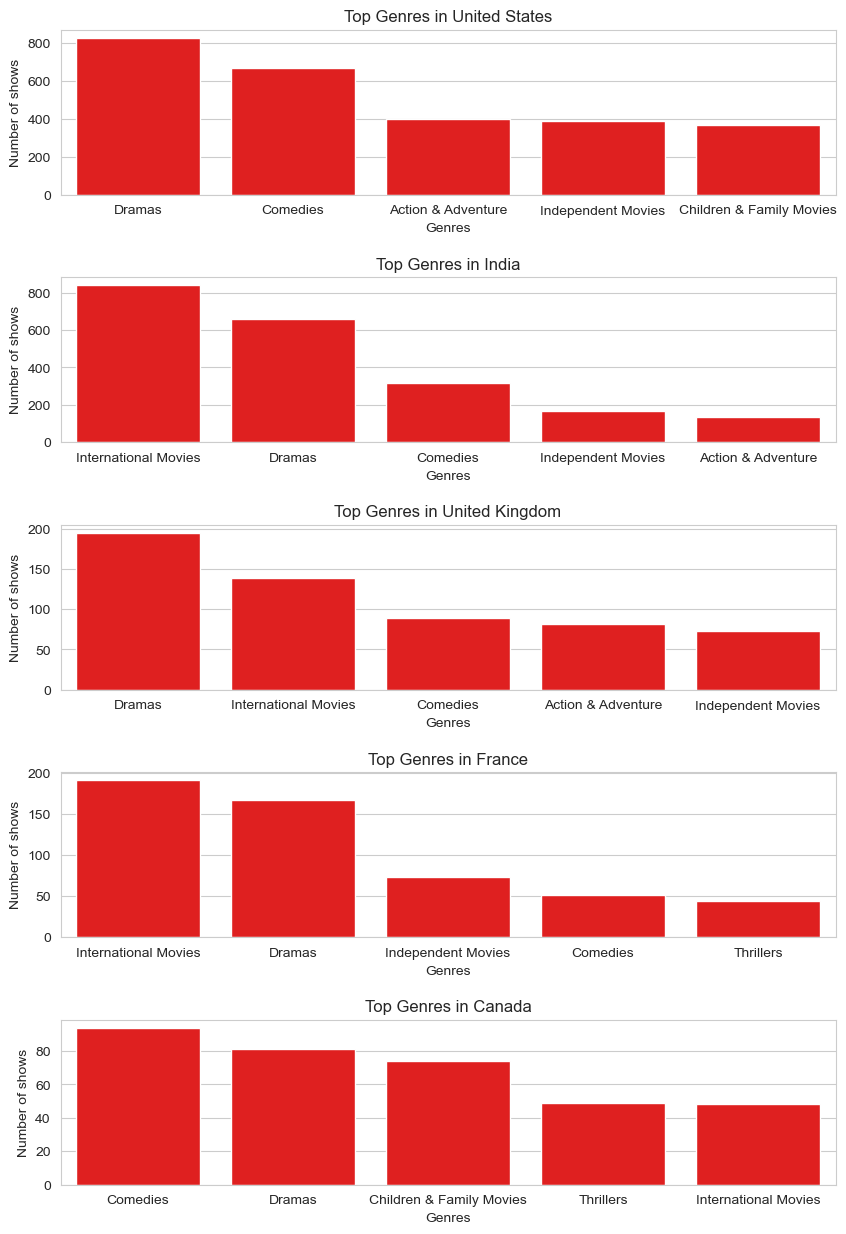

In [141]:
top_countries = tdf.country.value_counts().index[:5]
fig, axes = plt.subplots(5, figsize=(10, 15))
plt.subplots_adjust(hspace=0.5)

for i, country in enumerate(top_countries):
    data = tdf.loc[tdf['country'] == country]
    df = data.groupby('listed_in').agg(number_of_shows_produced=('show_id', 'nunique')).reset_index().sort_values(by = 'number_of_shows_produced', ascending = False)[:5]
    sns.barplot(x='listed_in', y='number_of_shows_produced', data=df, ax=axes[i], color = 'red')
    axes[i].set_title(f'Top Genres in {country}')
    axes[i].set_xlabel('Genres')
    axes[i].set_ylabel('Number of shows')
plt.savefig('Top Genres.png')

### Observation 11:
Here we can see that Dramas are most popular followed by Comedies, Independent Movies. It should be noted a big number of movies is termed as International Movies as Netflix itself is US-based but this category does not belong to any particular genre. So, we don't consider this to be of much use.

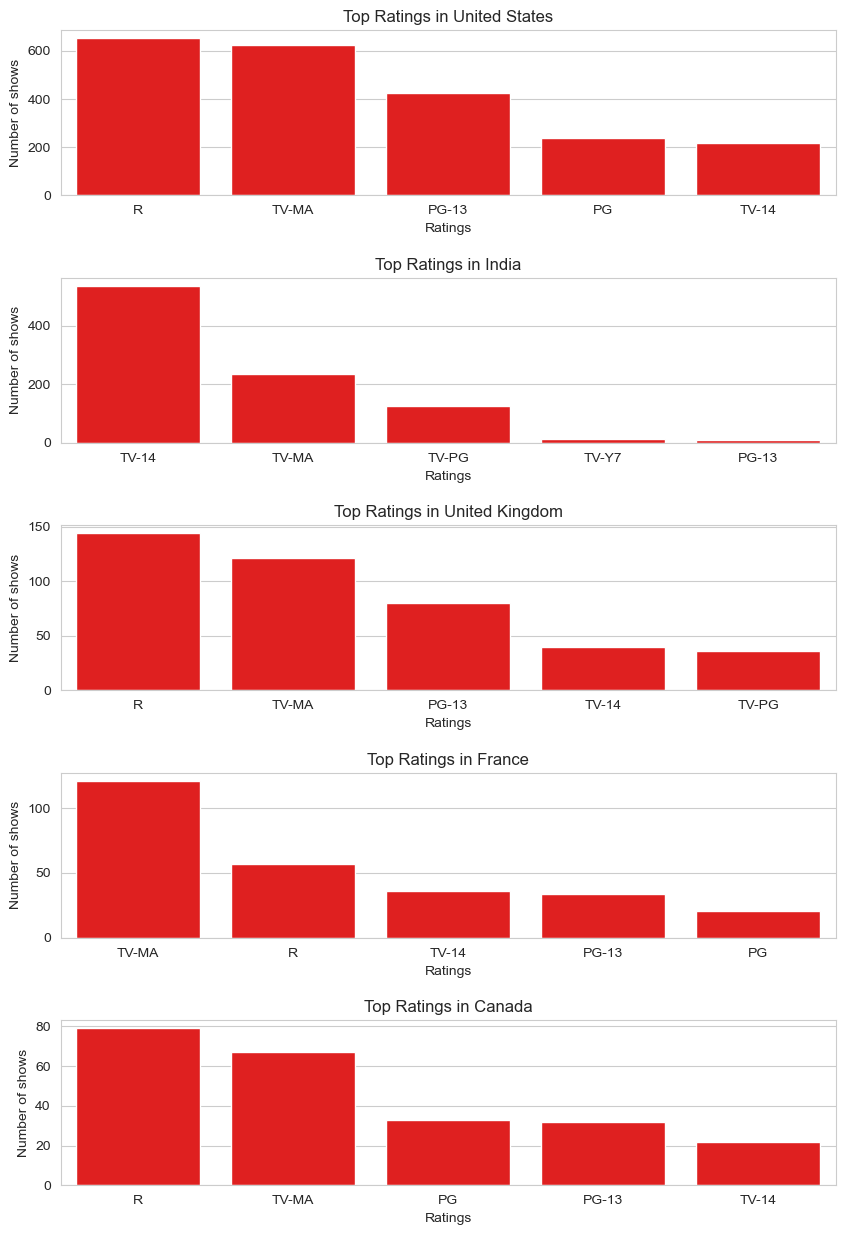

In [142]:
top_countries = tdf.country.value_counts().index[:5]
fig, axes = plt.subplots(5, figsize=(10, 15))
plt.subplots_adjust(hspace=0.5)

for i, country in enumerate(top_countries):
    data = tdf.loc[tdf['country'] == country]
    df = data.groupby('rating').agg(number_of_shows_produced=('show_id', 'nunique')).reset_index().sort_values(by = 'number_of_shows_produced', ascending = False)[:5]
    sns.barplot(x='rating', y='number_of_shows_produced', data=df, ax=axes[i], color = 'red')
    axes[i].set_title(f'Top Ratings in {country}')
    axes[i].set_xlabel('Ratings')
    axes[i].set_ylabel('Number of shows')
plt.savefig('Top Ratings.png')

### Observation 12: 
It can be observed that barring India, all countries in Top 5 make content with TV-MA or R rating. So, the demand in these countries clearly demands Mature content. In India, TV-14 content is produced the most.

Let's now focus on Directors and Cast to find out which Directors and Actors have produced the most content.

In [143]:
directors = tdf.groupby('director').agg(number_of_shows_produced = ('show_id', 'nunique'), first_show_release_year = ('release_year', 'min'), last_show_release_year = ('release_year', 'max'), preferred_category = ('listed_in', lambda x: x.mode()), preferred_type = ('type', lambda x: x.mode()), preferred_cast = ('cast', lambda x: x.mode()))
directors.sort_values(by= 'number_of_shows_produced', ascending = False)[:20]

,number_of_shows_produced,first_show_release_year,last_show_release_year,preferred_category,preferred_type,preferred_cast
director,,,,,,
Jan Suter,21,2016,2018,Stand-Up Comedy,Movie,"[Carlos Ballarta, Sofía Niño de Rivera]"
Raúl Campos,19,2016,2018,Stand-Up Comedy,Movie,Sofía Niño de Rivera
Jay Karas,15,2012,2020,Stand-Up Comedy,Movie,"[Adam Pally, Babatunde Aiyegbusi, Bill Burr, K..."
Marcus Raboy,15,2012,2020,Stand-Up Comedy,Movie,"[Bob Rubin, Patton Oswalt, Vir Das]"
Cathy Garcia-Molina,13,2008,2019,International Movies,Movie,Joross Gamboa
Youssef Chahine,12,1954,1999,Dramas,Movie,"[Mahmoud El Meleigy, Mahmoud Hemeida]"
Martin Scorsese,12,1967,2019,Dramas,Movie,"[Harvey Keitel, Ray Winstone]"
Jay Chapman,12,2012,2018,Stand-Up Comedy,Movie,"[Brad Paisley, D.L. Hughley, John Heffron, Jon..."
Steven Spielberg,11,1975,2016,Dramas,Movie,Harrison Ford


Lets see the stats of Directors who have their first release after 2010.

In [144]:
directors[directors['first_show_release_year']>= 2010].sort_values(by= 'number_of_shows_produced', ascending = False)[:20]

,number_of_shows_produced,first_show_release_year,last_show_release_year,preferred_category,preferred_type,preferred_cast
director,,,,,,
Jan Suter,21,2016,2018,Stand-Up Comedy,Movie,"[Carlos Ballarta, Sofía Niño de Rivera]"
Raúl Campos,19,2016,2018,Stand-Up Comedy,Movie,Sofía Niño de Rivera
Jay Karas,15,2012,2020,Stand-Up Comedy,Movie,"[Adam Pally, Babatunde Aiyegbusi, Bill Burr, K..."
Marcus Raboy,15,2012,2020,Stand-Up Comedy,Movie,"[Bob Rubin, Patton Oswalt, Vir Das]"
Jay Chapman,12,2012,2018,Stand-Up Comedy,Movie,"[Brad Paisley, D.L. Hughley, John Heffron, Jon..."
Don Michael Paul,10,2013,2020,Action & Adventure,Movie,Michael Gross
Ryan Polito,8,2012,2020,Stand-Up Comedy,Movie,John Mulaney
Hakan Algül,8,2010,2018,"[Comedies, International Movies]",Movie,Ata Demirer
Justin G. Dyck,8,2017,2018,Romantic Movies,Movie,"[Kaitlyn Leeb, Liam MacDonald]"


### Observation 13:
Jan Suter, Raúl Campos, Jay Karas and Marcus Raboy have been the most productive Directors. Preferred Show Type of Top Directors is Movie.

In [145]:
actors = tdf.groupby(['cast']).agg(total_number_of_shows= ('show_id', 'nunique'), first_movie = ('release_year', 'min'), last_movie = ('release_year', 'max'), category_with_most_shows = ('listed_in', lambda x: x.mode()), preferred_show_type = ('type', lambda x: x.mode()), director_most_worked_with = ('director', lambda x: x.mode()))
actors.sort_values(by = 'total_number_of_shows', ascending = False)[:20]

,total_number_of_shows,first_movie,last_movie,category_with_most_shows,preferred_show_type,director_most_worked_with
cast,,,,,,
Anupam Kher,42,1990,2019,International Movies,Movie,David Dhawan
Shah Rukh Khan,34,1992,2017,International Movies,Movie,Ketan Mehta
Naseeruddin Shah,31,1982,2019,Dramas,Movie,"[Abhishek Chaubey, Latif Faiziyev, Neeraj Pand..."
Om Puri,30,1982,2017,International Movies,Movie,Farhan Akhtar
Akshay Kumar,30,2002,2019,International Movies,Movie,"[Anees Bazmee, Karan Malhotra, Priyadarshan, S..."
Paresh Rawal,28,1990,2019,International Movies,Movie,Ketan Mehta
Amitabh Bachchan,28,1975,2019,International Movies,Movie,Karan Johar
Boman Irani,27,2003,2019,International Movies,Movie,"[Farhan Akhtar, Rajkumar Hirani, Tarun Mansukh..."
Kareena Kapoor,25,2001,2016,International Movies,Movie,Sidharth Malhotra


### Observation 14:
1. It can be noticed that most actors in Top 20 are Indians.
2. Anupam Kher has worked in most movies/shows and has worked with David Dhawan the most.

## Recommendations:
1. It can be seen from the data that TV Shows are on rise. On the other hand, Movies are on decline after Covid Outbreak.
2. Most of the content in recent year is still coming from US, but India is not far behind. We have also seen that countries from South East Asia are rapidly rising.
3. Most produced Genre in recent years is Dramas.
4. Most produced Content in recent year is purely for Mature Audience.
5. It is observed that the median lengths of movies is 98.00 minutes. As for the TV Shows, its observed that majority of the TV shows have only 2 seasons or less with the average of 1.71 seasons.